### 常见的时间复杂度 (Common Time Complexities)

| 记法 (Notation) | 中文名称 (Chinese Name) | 描述 (Description) | 例子 (Example) |
|---|---|---|---|
| O(1) | 常数时间 | 无论输入规模多大，操作次数都是固定的。 | 通过数组索引直接访问元素。 |
| O(log n) | 对数时间 | 每次迭代都将问题规模减半。 | 二分查找 (Binary Search)。 |
| O(n) | 线性时间 | 操作次数与输入规模 n 成正比。 | 遍历一个列表 (List) 中的所有元素。 |
| O(n log n) | 线性对数时间 | 效率非常好的排序算法，如归并排序。 | 快速排序 (Quick Sort)、归并排序 (Merge Sort)。 |
| O(n²) | 平方时间 | 通常涉及双重嵌套循环。 | 冒泡排序 (Bubble Sort)、选择排序 (Selection Sort)。 |
| O(2ⁿ) | 指数时间 | 随着 n 增长，时间呈几何级数增长，非常慢。 | 解决旅行推销员问题 (Traveling Salesman Problem) 的暴力解法。 |

### 数组 vs. 单链表操作时间复杂度对比表

| 操作 | 数组 | 单链表 | 原因解释 |
|---|---|---|---|
| 访问 | O(1) | O(n) | **数组**: 通过索引可直接计算内存地址。<br>**链表**: 必须从头节点开始逐个遍历。 |
| 搜索 | O(n) | O(n) | 在未排序的情况下，两者都需要遍历所有元素来查找。 |
| 在开头插入 | O(n) | O(1) | **数组**: 需要将所有现有元素向后移动一位。<br>**链表**: 只需创建新节点并调整头指针。 |
| 在开头删除 | O(n) | O(1) | **数组**: 需要将所有元素向前移动一位。<br>**链表**: 只需调整头指针并释放原头节点。 |
| 在末尾插入 | O(1) | O(n) | **数组**: 已知末尾位置，可直接赋值（动态数组扩容是摊销O(1)）。<br>**链表**: 必须遍历到最后一个节点才能修改其next指针。 |
| 在末尾删除 | O(1) | O(n) | **数组**: 直接减少长度计数器即可。<br>**链表**: 需要遍历到倒数第二个节点才能将其next指针置空。 |

### 单链表 vs. 双链表特性对比

| 特性 | 单链表 | 双链表 |
|---|---|---|
| 节点结构 | [data \| next] | [prev \| data \| next] |
| 内存占用 | 较小 | 较大（多一个指针） |
| 遍历方向 | 只能向前 | 可以向前和向后 |
| 访问前驱节点 | O(n) | O(1) |
| 在给定节点前插入 | O(n) | O(1) |
| 在给定节点后插入 | O(1) | O(1) |
| 删除给定节点 | O(n)* | O(1) |
| 删除头节点 | O(1) | O(1) |
| 删除尾节点 | O(n) | O(1) |
| 实现复杂度 | 相对简单 | 相对复杂 |

*注：单链表删除给定节点需要找到其前驱节点，所以是O(n)

# 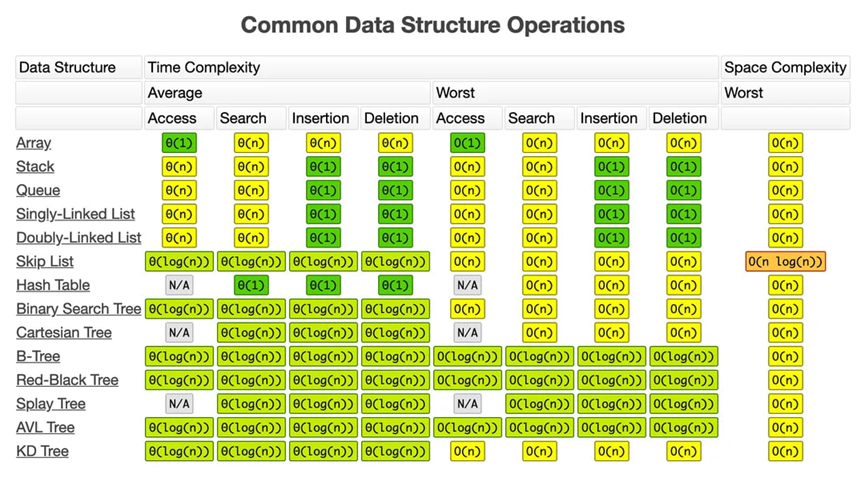

1️⃣ Insert at head（头插）

想象图：

原来：head -> A -> B -> C
插入 N 后：head -> N -> A -> B -> C

核心关系：

N->next = head

head = N

如果原来是空表，还要 tail = N

In [ ]:
void insertAtHead(Node*& head, int value) {
    Node* newNode = new Node(value);
    newNode->next = head;
    head = newNode;
    
}

2️⃣ Insert at tail（尾插）

原来：head -> A -> B -> tail(C)
插入 N 后：A -> B -> C -> N (tail)

两种情况：

空表：head = tail = N

非空：tail->next = N，tail = N

1. consider tail


In [ ]:
void insertAtTail(Node*& head, Node*& tail, int val) {
    Node* newNode = new Node(val); // next 在构造函数中设为 nullptr

    if (head == nullptr) {
        // 空链表：头尾都是这个新节点
        head = tail = newNode;
    } else {
        tail->next = newNode; // 旧 tail 指向新节点
        tail = newNode;       // 更新 tail
    }
}


2. do not consider tail

In [ ]:
void(NOde*& head,int val){
    Node* newNode = new Node(val)
    if(head == nullptr){
        head = newNode;
    }else{
        Node* current = head;
        while(current->next != nullptr){
            current = current->next;
        }
        current->next = newNode;
    }
}

3️⃣ Delete from head（删头）

原来：head -> A -> B -> C
删掉头 A 后：head -> B -> C

三种情况：

空表：什么都不做

只有一个节点：删掉后 head = tail = nullptr

多节点：head = head->next，然后 delete oldHead

In [ ]:
void deleteAtHead (Node*& head){
    if(head == nullptr) return nullptr;
    else {
        Node* del = head;
        head = head->next;
        delete del;
    }
}

4️⃣ Delete from tail（删尾）
* 这是单链表里最麻烦的一个，因为没有 prev 指针，需要从头走到尾的前一个节点。

In [ ]:
Node* deleteAtTail(Node* head) {
    // case 1
    if (head == NULL) {
        return NULL;
    }

    // Case 2: 链表只有一个节点 (head is the only node)
    // 如果头节点的下一个是 NULL,说明它就是唯一的节点。
    if (head->next == NULL) {
        // 删除这个唯一的节点。
        delete head;
        // 链表现在变为空，所以返回 NULL。
        return NULL;
    }

    // Case 3: 链表有两个或更多节点
    // 我们需要找到倒数第二个节点。
    Node* second_last = head;
    
    // 循环会一直进行，直到 second_last 的下一个节点的下一个节点是 NULL。
    // 这意味着 second_last->next 就是最后一个节点。
    while (second_last->next->next != NULL) {
        second_last = second_last->next;
    }

    // 此时,second_last 指向的是倒数第二个节点。
    // 我们要删除的节点是 second_last->next。
    Node* nodeToDelete = second_last->next;

    // 将倒数第二个节点的 next 指针设为 NULL,使其成为新的尾节点。
    second_last->next = NULL;

    // 删除原来的尾节点，释放内存。
    delete nodeToDelete;

    // 头节点没有改变，返回原来的 head。
    return head;
}